In [9]:
import csv
import numpy
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

## basic functions 


In [10]:
def running_mean(list_, num) :
    running_mean_list = []
    for i in range(len(list_) - num + 1):
        running_mean_list.append(numpy.mean(list_[i:i+num]))
    return running_mean_list

def list2rate(list_):
    rate = []
    for i in range(len(list_) - 1):
        rate.append( (list_[i+1] - list_[i])/list_[i] )
    return rate
def list2YoY(list_):
    YoY = []
    for i in range(12, len(list_)):
        YoY.append((list_[i] - list_[i-12]) / list_[i-12])
    return YoY

def shifting_corr(list1_, list2_, num, quater = False):
    shifting_corr = []
    min_len = min(len(list1_), len(list2_))
    if num > min_len:
        return print("NUM should not larger than" +str(min_len))
    shifting_corr.append(numpy.corrcoef(list1_[-min_len:], list2_[-min_len:])[0][1])
    for i in range(1,num):
        shifting_corr.append(numpy.corrcoef(list1_[-min_len: -i], list2_[-min_len +i:])[0][1])
        #print( "i = " + str(i) + " : " + str(numpy.corrcoef(list1_[-min_len: -i], list2_[-min_len +i:])[0][1]))
    f= plt.gcf()
    f.set_size_inches(8.69,5.27)
    plt.title("Shifting Corrcoef", fontsize = 14)
    if quater == False:
        plt.plot(shifting_corr, linewidth = 2.5, color = "darkblue")
        plt.xlabel("Shifting Period (Month)", fontsize = 14)
    else:
        plt.plot(numpy.arange(len(shifting_corr))/4, shifting_corr, linewidth = 2.5, color = "darkblue")
        plt.xlabel("Shifting Period (Year)", fontsize = 14)
            
    plt.ylabel("Corrcoef", fontsize = 14)


    plt.show()
    return shifting_corr

def rolling_corr(list1_, list2_, time_list_, num):
    rolling_corr = []
    min_len = min(len(list1_), len(list2_))
    if num > min_len:
        return print("NUM should not larger than" +str(min_len))
    for i in range(min_len - num):
          rolling_corr.append( numpy.corrcoef(list1_[-min_len + i : -min_len + i +num], list2_[-min_len + i : -min_len + i +num])[0][1] )
#    print("i = " + str(i) + " : " + str(numpy.corrcoef(real_rate[-len(real_rate) + i : -(len(real_rate)) + i +12], USD[-(len(real_rate))-2 +i:-(len(real_rate)) -2 +i +12])[0][1]))
    plt.plot(time_list_[-len(rolling_corr):], rolling_corr)
    plt.show()

    return rolling_corr

## load data from FRED

In [143]:
def load_data():
    
    df = pd.read_csv("/Users/feitenie/Downloads/TWEXMMTH.csv")
    df.set_index("DATE", inplace=True)

    df_GDP = pd.read_csv("/Users/feitenie/Downloads/GDPC1.csv")     
    df_GDP.set_index("DATE", inplace=True)

    df_UNEMPLOY = pd.read_csv("/Users/feitenie/Downloads/UNEMPLOY.csv")     
    df_UNEMPLOY.set_index("DATE", inplace=True)

    df_MICH = pd.read_csv("/Users/feitenie/Downloads/MICH.csv")     
    df_MICH.set_index("DATE", inplace=True)

    df_EXP = pd.read_csv("/Users/feitenie/Downloads/EXPGS.csv")     
    df_EXP.set_index("DATE", inplace=True)

    df_IMP = pd.read_csv("/Users/feitenie/Downloads/IMPGS.csv")     
    df_IMP.set_index("DATE", inplace=True)

    df_Y102 = pd.read_csv("/Users/feitenie/Downloads/T10Y2YM.csv")     
    df_Y102.set_index("DATE", inplace=True)

    df_OIL = pd.read_csv("/Users/feitenie/Downloads/MCOILWTICO.csv")     
    df_OIL.set_index("DATE", inplace=True)

    df_GS2 = pd.read_csv("/Users/feitenie/Downloads/GS2.csv")     
    df_GS2.set_index("DATE", inplace=True)

    df_CPI = pd.read_csv("/Users/feitenie/Downloads/CPALTT01USM659N.csv")     
    df_CPI.set_index("DATE", inplace=True)

    df = pd.concat([df, df_GDP, df_UNEMPLOY, df_MICH, df_EXP, df_IMP, df_Y102, df_OIL, df_GS2, df_CPI], axis =1 ,join='outer', sort=True)
    df["real"] = pd.Series( df["GS2"] -df["CPALTT01USM659N"] )
    df.columns = ["USD","GDP", "UNEMPLOY", "MICH", "EXP", "IMP", "T102", "OIL", "GS2", "CPI", "real_rate"]
     
    return  df

In [144]:
df  = load_data()
time = df.index[df["USD"].notnull()].values
time[-len(USD_rm)]

'1988-12-01'

## 0. general figure

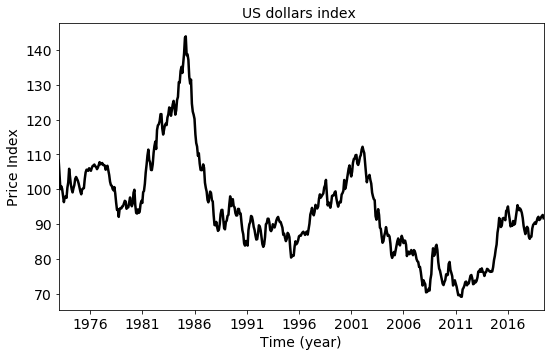

Text(0,0.5,'Detrended Price Index')

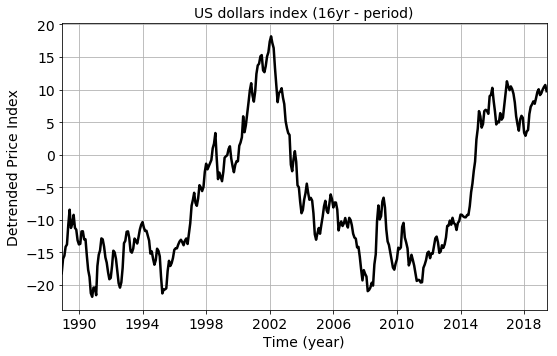

In [147]:
USD = df["USD"][df["USD"].notnull()].values
time = [datetime.datetime.strptime(date, "%Y-%m-%d") for date in df.index[df["USD"].notnull()].values ]
f = plt.gcf()
f.set_size_inches(8.69,5.27)

plt.plot(time, USD, color = "black", linewidth = 2.5)
plt.title( "US dollars index ", fontsize = 14)
plt.xlabel("Time (year)", fontsize = 14)
plt.ylabel("Price Index", fontsize = 14)
plt.xlim([time[0],time[-1]])
plt.show()

USD_rm = running_mean(USD,16*12)
f = plt.gcf()
f.set_size_inches(8.69,5.27)
plt.plot(time[-len(USD_rm):] ,numpy.array(USD[-len(USD_rm):]) - numpy.array(USD_rm[-len(USD_rm):]), color = "black", linewidth = 2.5)
plt.xlim([time[-len(USD_rm)] ,time[-1]])
plt.grid()
plt.title( "US dollars index (16yr - period)", fontsize = 14)
plt.xlabel("Time (year)", fontsize = 14)
plt.ylabel("Detrended Price Index", fontsize = 14)

## 1. real interest rate

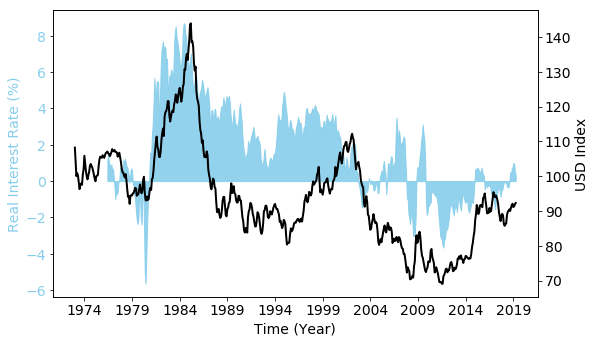

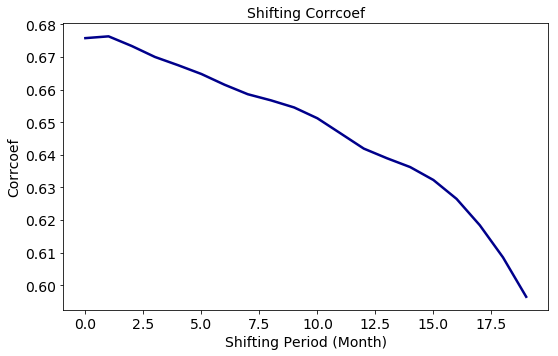

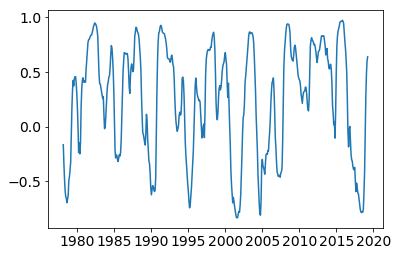

In [148]:
real_rate = df["real_rate"][df["real_rate"].notnull()].values

def real_interest_rate(real_rate = real_rate, USD = USD[:-2], time = time[:-2]):
    size = min(len(real_rate), len(USD))

    # plot for time series
    f= plt.gcf()
    f.set_size_inches(8.69,5.27)
    ax = plt.gca()
    ax2 = ax.twinx()

    ax.fill_between( time[-(len(real_rate)):], 0 ,real_rate , alpha = 0.9,  color = "skyblue")
    p2, = ax2.plot( time[-len(USD):], USD, color = "black" , linewidth = 2)

    ax.yaxis.label.set_color(color = "skyblue")
    ax2.yaxis.label.set_color( p2.get_color(),)
    ax.set_xlabel("Time (Year)", fontsize = 14)
    ax.set_ylabel("Real Interest Rate (%)", fontsize = 14, color = "skyblue")
    ax.tick_params(axis='y',labelcolor = "skyblue")
    ax2.set_ylabel("USD Index", fontsize = 14)
    plt.show()


    # calculate for shifting corr
    # the result seems no robust insight for now
    shifting_corr_realrate = shifting_corr(real_rate, USD, 20)
    rolling_corr_real_rate = rolling_corr(real_rate, USD, time, 20)

real_interest_rate()


## 2. Economic cycle
considering Y10/Y2 and Crude Oil Price

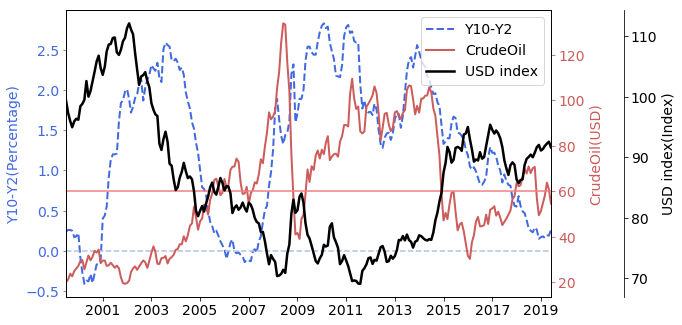

In [156]:
T102 = df["T102"][df["T102"].notnull()].values
OIL = df["OIL"][df["OIL"].notnull()].values

        

def economic_cycle(name_list_, unit_list_, list_x1_ = T102, list_x2_ = OIL, listY_ = USD, time_list_= time, Year = 20):
    # list_x1_ and list_x2_ are viewed to be strongly relative to listY_ -- the target
    if min(len(list_x1_), len(list_x2_), len(listY_)) < Year*12:
        return print("Year should not be larger than " + str (min(len(list_x1_), len(list_x2_), len(listY_))/12))
    #general picture

    f = plt.gcf()  
    f.set_size_inches(8.69,5.27)
    ax = plt.gca()
    plt.ylabel( name_list_[0]+"("+ unit_list_[0]+")", fontsize = 14, color = "royalblue")
    ax2 = ax.twinx()
    ax3 = ax.twinx()
    ax3.spines["right"].set_position(("axes", 1.15))

    line1, = ax.plot(time_list_[-Year*12:], list_x1_[-Year*12:] ,color = 'royalblue', linewidth = 2, linestyle = "--")
    #print(numpy.mean(T102[-32*12:])) # mean = 1.12, STD = 0.87 ; cr = 1.3 - 0.9 = 0.25###32/20
    line2, = ax2.plot(time_list_[-Year*12:], list_x2_[-Year*12:] , color = 'indianred', linewidth = 2)
    line3, = ax3.plot(time_list_[-Year*12:],listY_[-Year*12:], color = 'black', linewidth = 2.5)
    ax2.set_ylabel( name_list_[1]+"("+ unit_list_[1]+")", fontsize = 14, color = "indianred")
    ax3.set_ylabel( name_list_[2]+"("+ unit_list_[2]+")", fontsize = 14)
    ax.tick_params( axis = "y", labelcolor = "royalblue", color = "royalblue")
    ax2.tick_params( axis = "y", labelcolor = "indianred", color = "indianred")



    plt.xlim([time_list_[-Year*12],time_list_[-1]])
    ax.plot(time_list_[-Year*12:],numpy.ones(Year*12)*0, color = 'lightsteelblue', linewidth = 1.5, linestyle = "--")
    ax2.plot(time_list_[-Year*12:],numpy.ones(Year*12)*60, color = 'lightcoral', linewidth = 1.5)
    #ax.set_ylim([-0.5,3.5])
    #ax2.set_ylim([10,150])


    plt.legend((line1, line2, line3),(name_list_), fontsize = 14)
    plt.xlabel("Time", fontsize = 14)
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14
    plt.show()
    
economic_cycle(["Y10-Y2","CrudeOil","USD index"], ["Percentage", "USD", "Index"],T102, OIL, USD, time, 20)

## 2.1 Seperate Economic cycle

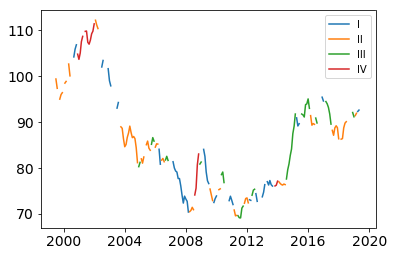

In 20 year(s), the corrcoef for USD index and USD index = -0.8682707716959124


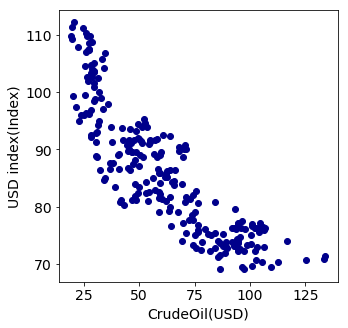

@Phase 4, corrcoef = -0.9250979139550272


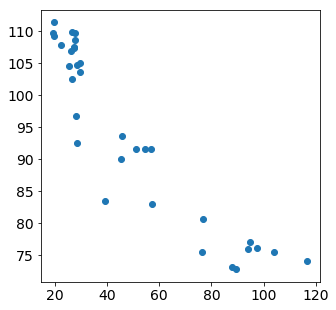

@Phase 3, corrcoef = -0.8501931757824678


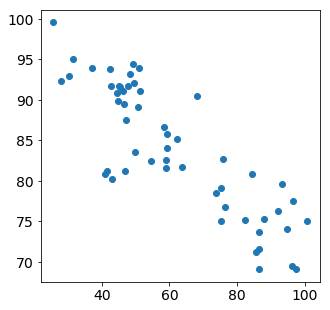

@Phase 2, corrcoef = -0.8437262102674025


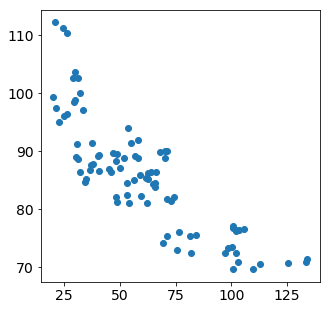

@Phase 1, corrcoef = -0.8981076325804277


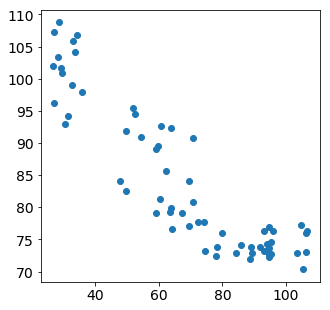

In [157]:
def seperate_economic_cycle(name_list_, unit_list_, list_x1_ = T102, list_x2_ = OIL, listY_ = USD, time_list_= time_usd, Year = 20):
    # list_x1_ and list_x2_ are both filter; list_x2_ is viewed to be strongly relative to list3_ -- the target
    if min(len(list_x1_), len(list_x2_), len(listY_)) < Year*12:
        return print("Year should not be larger than " + str (min(len(list_x1_), len(list_x2_), len(listY_))/12))    
    
    list1_rm = running_mean(list_x1_, 4)
    list_T = numpy.array(numpy.array(list_x1_[-Year*12:]) - numpy.array(list1_rm[-Year*12:])) > 0
    list_Tf = numpy.array(numpy.array(list_x1_[-Year*12:]) - numpy.array(list1_rm[-Year*12:])) < 0

    list2_rm = running_mean(list_x2_, 4)
    list_O = numpy.array(numpy.array(list_x2_[-Year*12:]) - numpy.array(list2_rm[-Year*12:])) > 0
    list_Of = numpy.array(numpy.array(list_x2_[-Year*12:]) - numpy.array(list2_rm[-Year*12:])) < 0

    # whether the value follow the <0 list_1(Y10 - Y2)
    list_T_bottom = []
    for i in range(Year*12):
        tmp = ([numpy.array(list_x1_[-Year*12 + i :- Year*12 + i]) < 0])
        tmp = numpy.array(tmp)
        list_T_bottom.append(tmp.any())
    

    list_T_bottomf = [not i for i in list_T_bottom] 

    phase_1 = list_T & list_O #&list_T_bottomf
    phase_2 = list_Tf & list_O #& list_T_bottom
    phase_3 = list_Tf & list_Of
    phase_4 = list_T &  list_Of
    listY_ = listY_[-Year*12:]
    time_ = time_list_[-Year*12:]
    plt.plot(numpy.ma.masked_where(phase_1 == False, time_) , numpy.ma.masked_where(phase_1 == False, listY_))
    plt.plot(numpy.ma.masked_where(phase_2 == False, time_) , numpy.ma.masked_where(phase_2 == False, listY_))
    plt.plot(numpy.ma.masked_where(phase_3 == False, time_) , numpy.ma.masked_where(phase_3 == False, listY_))
    plt.plot(numpy.ma.masked_where(phase_4 == False, time_) , numpy.ma.masked_where(phase_4 == False, listY_))
    plt.legend(["I","II","III","IV"])
    plt.show()
    
    value = numpy.corrcoef(list_x2_[-Year*12:] , listY_)[0][1]
    print("In " + str(Year) + " year(s), the corrcoef for "+ name_list_[2] + " and " + name_list_[-1] + " = " + str(value))
    f = plt.gcf()  
    f.set_size_inches(5,5)
    plt.scatter(list_x2_[-Year*12:] , listY_, color = "darkblue")
    plt.xlabel( name_list_[1] + "(" + unit_list_[1] + ")", fontsize = 14)
    plt.ylabel( name_list_[2] + "(" + unit_list_[2] + ")", fontsize = 14)
    plt.show()

    
    f = plt.gcf()  
    f.set_size_inches(5,5)
    plt.scatter(numpy.ma.masked_where(phase_4 == False, list_x2_[-Year*12:]) , numpy.ma.masked_where(phase_4 == False, listY_))
    x1 = numpy.ma.masked_where(phase_4 == False, list_x2_[-Year*12:])
    y1 = numpy.ma.masked_where(phase_4 == False, listY_)
    X = [x1[x] for x in range(len(x1)) if phase_4[x] ]
    Y = [y1[x] for x in range(len(x1)) if phase_4[x] ]
    value = numpy.corrcoef(X , Y)[0][1]
    print("@Phase 4, corrcoef = " + str(value))
    plt.show()

    f = plt.gcf()  
    f.set_size_inches(5,5)
    plt.scatter(numpy.ma.masked_where(phase_3 == False, list_x2_[-Year*12:]) , numpy.ma.masked_where(phase_3 == False, listY_))
    x1 = numpy.ma.masked_where(phase_3 == False, list_x2_[-Year*12:])
    y1 = numpy.ma.masked_where(phase_3 == False, listY_)
    X = [x1[x] for x in range(len(x1)) if phase_3[x] ]
    Y = [y1[x] for x in range(len(x1)) if phase_3[x] ]
    value = numpy.corrcoef(X , Y)[0][1]
    print("@Phase 3, corrcoef = " + str(value))
    plt.show()
    f = plt.gcf()  
    f.set_size_inches(5,5)
    plt.scatter(numpy.ma.masked_where(phase_2 == False, list_x2_[-Year*12:]) , numpy.ma.masked_where(phase_2 == False, listY_))
    x1 = numpy.ma.masked_where(phase_2 == False, list_x2_[-Year*12:])
    y1 = numpy.ma.masked_where(phase_2 == False, listY_)
    X = [x1[x] for x in range(len(x1)) if phase_2[x] ]
    Y = [y1[x] for x in range(len(x1)) if phase_2[x] ]
    value = numpy.corrcoef(X , Y)[0][1]
    print("@Phase 2, corrcoef = " + str(value))
    plt.show()

    f = plt.gcf()  
    f.set_size_inches(5,5)
    plt.scatter(numpy.ma.masked_where(phase_1 == False, list_x2_[-Year*12:]) , numpy.ma.masked_where(phase_1 == False, listY_))
    x1 = numpy.ma.masked_where(phase_1 == False, list_x2_[-Year*12:])
    y1 = numpy.ma.masked_where(phase_1 == False, listY_)
    X = [x1[x] for x in range(len(x1)) if phase_1[x] ]
    Y = [y1[x] for x in range(len(x1)) if phase_1[x] ]
    value = numpy.corrcoef(X , Y)[0][1]
    print("@Phase 1, corrcoef = " + str(value))
    plt.show()

seperate_economic_cycle(["Y10-Y2","CrudeOil","USD index"], ["Percentage", "USD", "Index"],T102, OIL, USD, time, 20)


## 3. International Trade

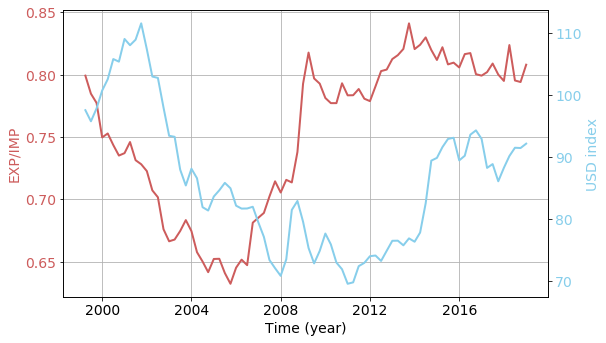

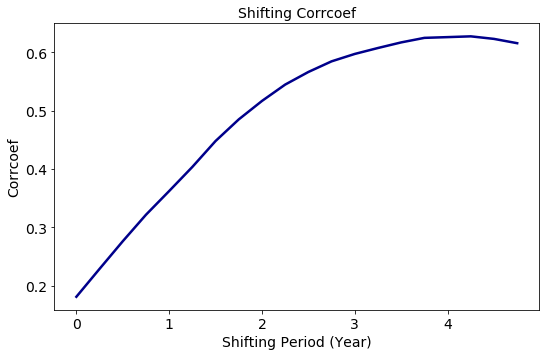

In [158]:
EXP = df["EXP"][df["EXP"].notnull()].values
IMP = df["IMP"][df["IMP"].notnull()].values
#the begining of USD is 1973-01-01, list of time is chosen by USD  
begin_month = numpy.mod((time[0].month) - 1, 3)
if begin_month == 0:
    USD_qua = [numpy.mean(numpy.array(USD[i*3 : (i+1)*3]).astype("float")) for i in range(int(len(USD)/3))]
elif  begin_month == 1:
    USD_qua = [numpy.mean(numpy.array(USD[i*3 +2: (i+1)*3  +2]).astype("float")) for i in range(int(len(USD)/3))]
else:
    USD_qua = [numpy.mean(numpy.array(USD[i*3 +1: (i+1)*3  +1]).astype("float")) for i in range(int(len(USD)/3))]


def EXP_over_IMP(EXP = EXP, IMP = IMP, USD_qua = USD_qua, Year = 20):
    ###
    if min(len(EXP), len(IMP)) < Year*4:
        return print("Year should not be larger than " + str (min(len(EXP), len(IMP))/4)) 

    ### EXP and IMP ###
    ratio = numpy.array(EXP)  / ( numpy.array(IMP) )
    f = plt.gcf()  
    f.set_size_inches(8.69, 5.27)
    ax = plt.gca()
    plt.grid()
    ax2 = ax.twinx()
    ax.plot(time_exp[-Year*4:],ratio[-Year*4:], color = "indianred", linewidth = 2)
    ax2.plot(time_exp[-Year*4:], USD_qua[-Year*4:], color = "skyblue", linewidth = 2 )
    ax.set_xlabel("Time (year)", fontsize = 14)
    ax2.set_ylabel("USD index", fontsize = 14, color = "skyblue")
    ax2.tick_params(axis='y',labelcolor = "skyblue")
    ax.set_ylabel("EXP/IMP", fontsize = 14, color = "indianred")
    ax.tick_params(axis='y',labelcolor = "indianred")
    plt.show()
    #shifting_corr(ratio, USD_qua, 15, quater = True)
    shifting_corr(ratio, USD_qua, 20, quater = True)

EXP_over_IMP()


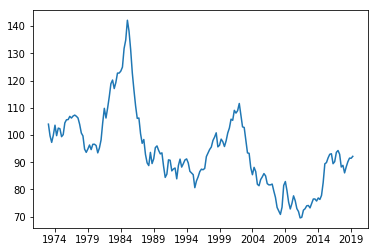

array([[ 1.        , -0.02109963],
       [-0.02109963,  1.        ]])

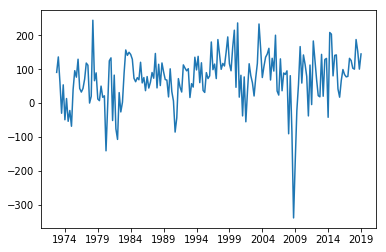

In [131]:
gdp_delta = []
for i in range(len(GDP) - 1):
    gdp_delta.append(GDP[i+1] - GDP[i])

size = min(len(USD_qua), len(gdp_delta))
time_usd_qua = time_usd[::3]
plt.plot(time_usd_qua[-size:], USD_qua[-size:])
plt.show()
#print(len(time_gdp[-size:]))
plt.plot(time_gdp[-size:], gdp_delta[-size:])

numpy.corrcoef(USD_qua[-size:], gdp_delta[-size:])

